In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#The dataset to develop this work, has 444700 rows, and 6 columns related to the traffic crashes.
#The data analysis is focus on some statistics and relationships among the considered variables.
#The part 2, considers the analysis of the number of traffic crashes vs the lighting conditions.
#All this analysis should be the basis for developing public programs that contribute to a safer way of traveling.

#PART 2

datatoload = "data_traffic_crashes.csv"
datawork = pd.read_csv(datatoload)

datawork


,speedlimit,devicecondic,lightingcondic,crashtype,roadway,roaddefect
0,10,NO CONTROLS,DARKNESS,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
1,45,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DRY,NO DEFECTS
2,35,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,DRY,NO DEFECTS
3,30,FUNCTIONING PROPERLY,DARKNESS LIGHTED ROAD,TURNING,DRY,NO DEFECTS
4,35,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
...,...,...,...,...,...,...
444695,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444696,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444697,30,FUNCTIONING PROPERLY,DAYLIGHT,REAR END,DRY,NO DEFECTS
444698,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS


In [2]:
#Let us count the number of traffic crashes for each lighting conditions and show the respective percentages.

totalcr = datawork["lightingcondic"].count()
report = datawork.groupby("lightingcondic")
total = report["lightingcondic"].count()
percent = total / totalcr * 100
df = pd.DataFrame({"total crashes": total, "percentage": percent})
df.index.name = None
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes,percentage
DARKNESS,22323,5.02%
DARKNESS LIGHTED ROAD,93165,20.95%
DAWN,7696,1.73%
DAYLIGHT,291875,65.63%
DUSK,13615,3.06%
UNKNOWN,16026,3.60%


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

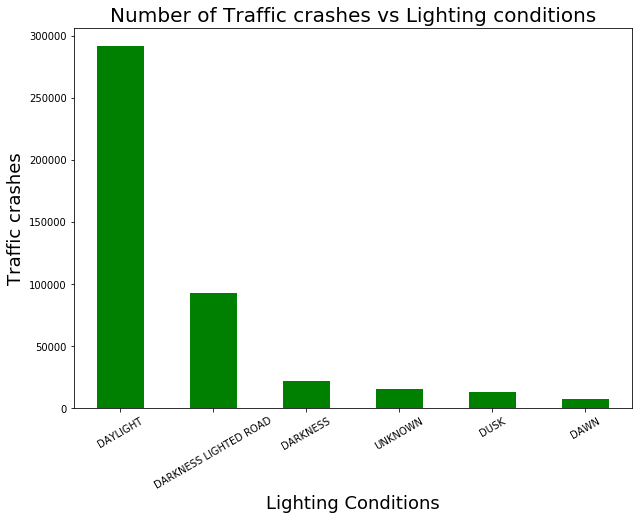

In [3]:
#This is about the number of traffic crashes occurred in each lighting condition.
#datawork["lightingcondic"].value_counts().unique ; in case it is needed

datawork["lightingcondic"].value_counts().plot(kind = 'bar', color = 'green', figsize = (10,7))
plt.title("Number of Traffic crashes vs Lighting conditions", size = 20)
plt.xlabel('Lighting Conditions', size = 18)
plt.ylabel('Traffic crashes', size = 18)
plt.xticks(rotation = 30)


In [4]:
#Let us see how many crashes occur at day light and in dry roads.

total = datawork[(datawork['lightingcondic'] == 'DAYLIGHT') & (datawork['roadway'] == 'DRY')]
totalB = len(total)
totalC = datawork["lightingcondic"].count()
perc = totalB / totalC * 100
df = pd.DataFrame({"total crashes at daylight and dry road": [totalB],
                  "percentage":[perc]})
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes at daylight and dry road,percentage
0,235518,52.96%


In [5]:
#Now let us see how many crashes occur in darkness lighted road and in wet roads.

total = datawork[(datawork['lightingcondic'] == 'DARKNESS LIGHTED ROAD') & (datawork['roadway'] == 'WET')]
totalB = len(total)
totalC = datawork["lightingcondic"].count()
perc = totalB / totalC * 100
df = pd.DataFrame({"total crashes in darkness lighted road and in wet road": [totalB],
                  "percentage":[perc]})
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes in darkness lighted road and in wet road,percentage
0,17460,3.93%


In [6]:
#On the other hand let us get into the crash type.

totalcr = datawork["lightingcondic"].count()
report = datawork.groupby("crashtype")
total = report["crashtype"].count()
percent = total / totalcr * 100
df = pd.DataFrame({"total crashes": total, "percentage": percent})
df.index.name = None
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes,percentage
ANGLE,46717,10.51%
ANIMAL,304,0.07%
FIXED OBJECT,19832,4.46%
HEAD ON,3744,0.84%
OTHER NONCOLLISION,1526,0.34%
OTHER OBJECT,4208,0.95%
OVERTURNED,231,0.05%
PARKED MOTOR VEHICLE,100832,22.67%
PEDALCYCLIST,6659,1.50%
PEDESTRIAN,10446,2.35%


Text(0, 0.5, 'Traffic crashes')

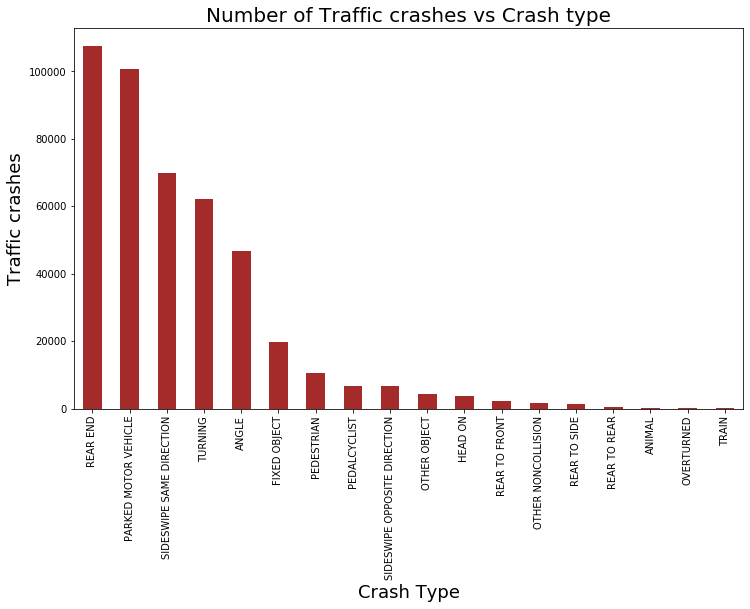

In [7]:
#Now let us see the graph

datawork["crashtype"].value_counts().plot(kind = 'bar', color = 'brown', figsize = (12,7))
plt.title("Number of Traffic crashes vs Crash type", size = 20)
plt.xlabel('Crash Type', size = 18)
plt.ylabel('Traffic crashes', size = 18)
#plt.xticks(rotation = 30)


In [8]:
#Now let us see how many crashes occur when the car is turning and in wet roads.

total = datawork[(datawork['crashtype'] == 'TURNING') & (datawork['roadway'] == 'WET')]
totalB = len(total)
totalC = datawork["lightingcondic"].count()
perc = totalB / totalC * 100
df = pd.DataFrame({"total crashes when the car is turning in wet road": [totalB],
                  "percentage":[perc]})
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes when the car is turning in wet road,percentage
0,9378,2.11%


In [9]:
#Let us see how many crashes occur at the rear-end of the car and in dry roads.

total = datawork[(datawork['crashtype'] == 'REAR END') & (datawork['roadway'] == 'DRY')]
totalB = len(total)
totalC = datawork["lightingcondic"].count()
perc = totalB / totalC * 100
df = pd.DataFrame({"total crashes at the rear-end of the car and dry road": [totalB],
                  "percentage":[perc]})
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes at the rear-end of the car and dry road,percentage
0,79485,17.87%


In [10]:
#What about the defects of the road? Do they affect the frequency of the traffic crashes?
#It seems that most of the traffic crashes occur in no-defects road.

totalcr = datawork["lightingcondic"].count()
report = datawork.groupby("roaddefect")
total = report["roaddefect"].count()
percent = total / totalcr * 100
df = pd.DataFrame({"total crashes": total, "percentage": percent})
df.index.name = None
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes,percentage
DEBRIS ON ROADWAY,396,0.09%
NO DEFECTS,370603,83.34%
OTHER,2537,0.57%
RUT HOLES,4301,0.97%
SHOULDER DEFECT,979,0.22%
UNKNOWN,64080,14.41%
WORN SURFACE,1804,0.41%


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

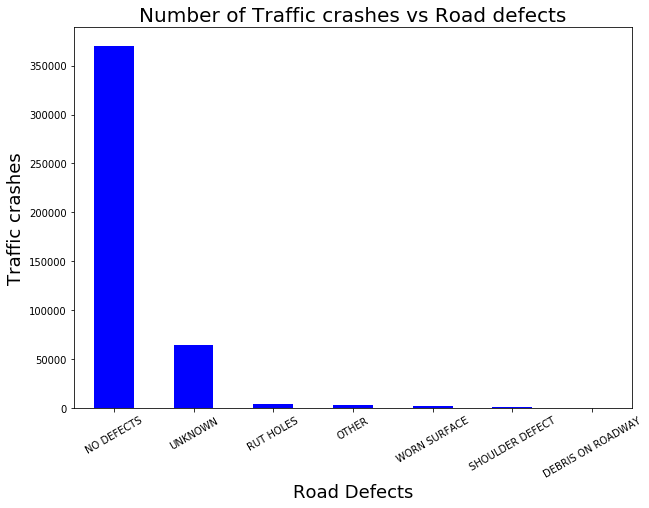

In [11]:
#Let us see the graph

datawork["roaddefect"].value_counts().plot(kind = 'bar', color = 'blue', figsize = (10,7))
plt.title("Number of Traffic crashes vs Road defects", size = 20)
plt.xlabel('Road Defects', size = 18)
plt.ylabel('Traffic crashes', size = 18)
plt.xticks(rotation = 30)


In [16]:
#Let us see how many crashes occur at day light, in dry roads and no defect roads.

total = datawork[(datawork['roadway'] == 'DRY') & (datawork['lightingcondic'] == 'DAYLIGHT') & (datawork['roaddefect'] == 'NO DEFECTS')]
totalB = len(total)
totalC = datawork["lightingcondic"].count()
perc = totalB / totalC * 100
df = pd.DataFrame({"total crashes at daylight-dry roads-no defect roads": [totalB],
                  "percentage":[perc]})
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes at daylight-dry roads-no defect roads,percentage
0,210911,47.43%
